In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [2]:
df = pd.read_csv('properties.csv')

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/1113565266.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('properties.csv')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 146 entries, ID to Price Range
dtypes: category(1), float64(12), int64(93), object(40)
memory usage: 14.0+ MB


In [6]:
df.columns

Index(['ID', 'Possession Status', 'Availability Starts From', 'Floor No',
       'Commercial', 'Developer', 'Approved Authority Name', 'Units Available',
       'Price', 'Price (English)',
       ...
       'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
       'Cycling & Jogging Track', 'Fire Fighting Equipment',
       'Aesthetically designed landscape garden', 'Possession By', 'NRI Pref',
       'Land Area / Covered Area', 'Land Area Unit', 'Pantry Type'],
      dtype='object', length=145)

In [14]:
df.describe()

,ID,Units Available,Price,Maintenance Charges,Booking Amount,Covered Area,sqft Price,Carpet Area,Bathroom,bedroom,...,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Land Area / Covered Area,Land Area Unit
count,12685.000000,6135.000000,1.260100e+04,6.283000e+03,7.701000e+03,11374.000000,1.148000e+04,10133.000000,12616.000000,12685.000000,...,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,84.000000,86.000000
mean,6343.000000,7.751589,2.640261e+07,9.076812e+03,8.101702e+05,1037.746439,2.243507e+04,819.201224,2.143389,1.987150,...,0.540402,0.540323,0.536539,0.536855,0.537958,0.540166,0.544028,0.536382,7248.869048,12847.825581
std,3661.988417,26.335448,3.653648e+08,2.399983e+05,2.997549e+06,727.327389,3.187654e+05,585.037811,0.926965,0.943404,...,0.498385,0.498391,0.498683,0.498660,0.498577,0.498404,0.498077,0.498694,18240.893916,10.643078
min,1.000000,0.000000,1.000000e+05,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12800.000000
25%,3172.000000,0.000000,7.000000e+06,1.000000e+01,1.000000e+05,605.500000,1.000000e+04,468.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,792.500000,12850.000000
50%,6343.000000,1.000000,1.350000e+07,2.500000e+03,5.000000e+05,850.000000,1.634850e+04,671.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,12850.000000
75%,9514.000000,5.000000,2.550000e+07,6.000000e+03,9.000000e+05,1200.000000,2.461500e+04,950.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3392.500000,12850.000000
max,12685.000000,750.000000,4.080000e+10,1.768000e+07,1.050000e+08,15006.000000,3.400000e+07,20870.000000,10.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000,12853.000000


In [ ]:
df = df.sort_values(by='Price')

# Task 1
```
As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities. (5 Marks)
```

In [29]:
low_threshold = df['Price'].quantile(0.33)
high_threshold = df['Price'].quantile(0.66)

def categorize_price(price):
    if price < low_threshold:
        return 'low'
    elif price < high_threshold:
        return 'medium'
    else:
        return 'high'
    
df['Price Category'] = df['Price'].apply(categorize_price)

summary_table = df.groupby('Price Category').agg({
    'Price': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

summary_table.columns = ['Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

category_order = ['low', 'medium', 'high']
summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)
summary_table = summary_table.sort_values('Price Category').reset_index(drop=True)
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

+---+----------------+--------------------+--------------------+------------+---------------+-------+
|   | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+---+----------------+--------------------+--------------------+------------+---------------+-------+
| 0 |      low       | 5138200.357056695  | 2029363.1047203522 |  100000.0  |   8650000.0   | 4145  |
| 1 |     medium     | 13541293.728036486 | 3216797.6920596985 | 8700000.0  |  19780000.0   | 4166  |
| 2 |      high      | 59437872.96969697  | 624868752.6113703  | 19800000.0 | 40800000001.0 | 4290  |
+---+----------------+--------------------+--------------------+------------+---------------+-------+


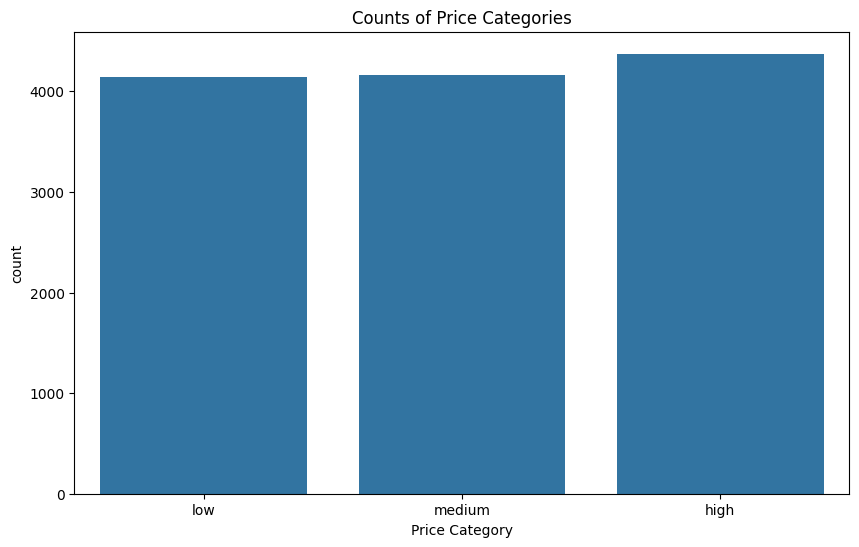

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Price Category', order=category_order)
plt.title('Counts of Price Categories')
plt.show()

# Task 2
```
Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like property type, city, and key amenities. What method/tool would you use to present this information effectively? (5 Marks)
```

+----+-------------------------+----------------+--------------------+--------------------+------------+---------------+-------+
|    |    Type of Property     | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+----+-------------------------+----------------+--------------------+--------------------+------------+---------------+-------+
| 0  |        Apartment        |      low       | 5225172.234836703  | 1997197.0418378287 |  100000.0  |   8650000.0   | 3858  |
| 1  |        Apartment        |     medium     | 13545404.98351378  | 3220140.4992114184 | 8700000.0  |  19780000.0   | 4064  |
| 2  |        Apartment        |      high      | 59245486.03669502  | 637909146.1415212  | 19800000.0 | 40800000001.0 | 4115  |
| 3  | Builder Floor Apartment |      low       | 4044137.917241379  | 1923022.3207123382 | 1100000.0  |   8500000.0   |  145  |
| 4  | Builder Floor Apartment |     medium     | 12778947.368421054 | 2593042.4470668016 | 90000

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/3208472100.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


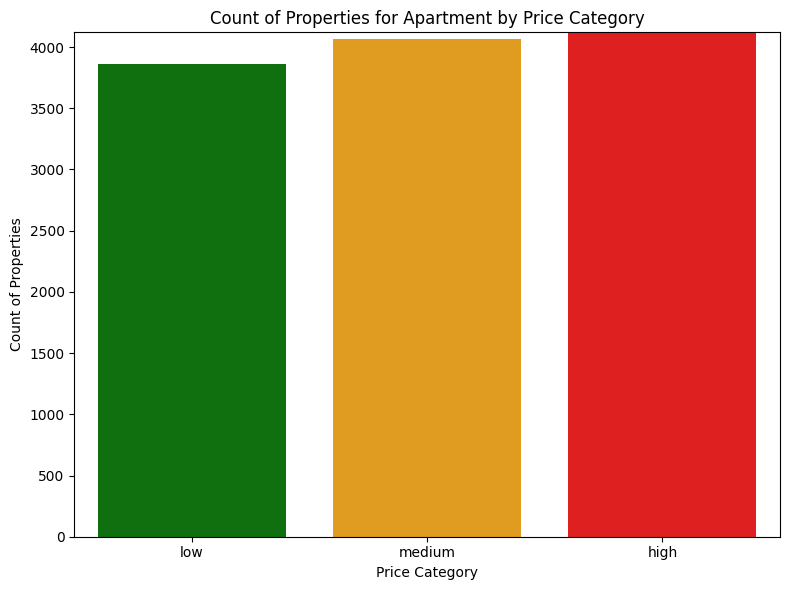

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/3208472100.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


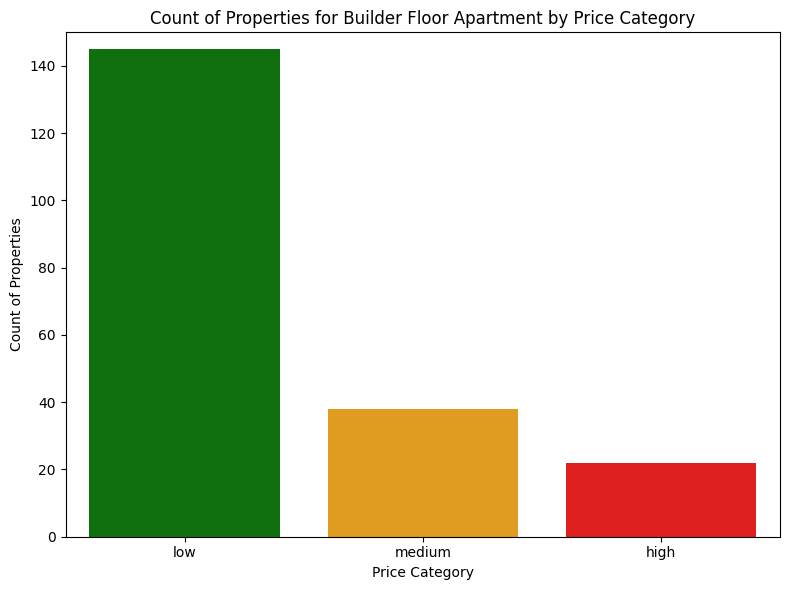

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/3208472100.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


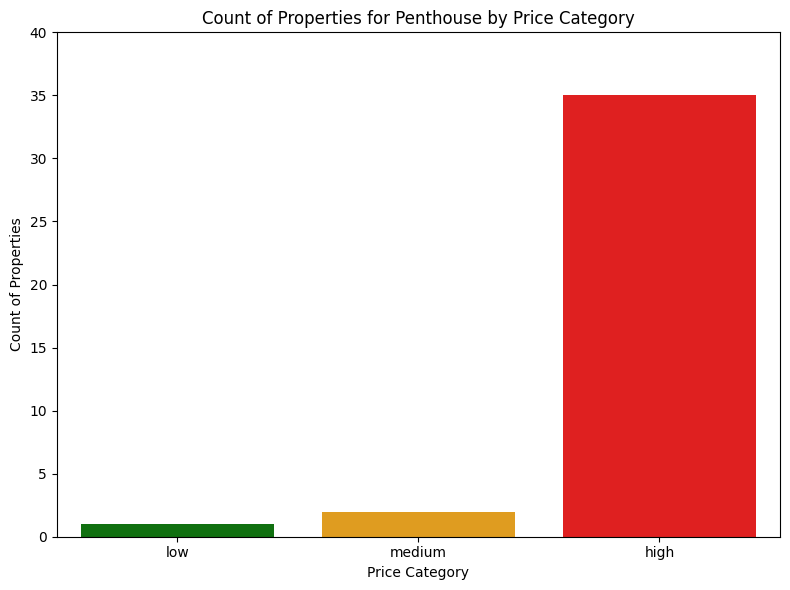

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/3208472100.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


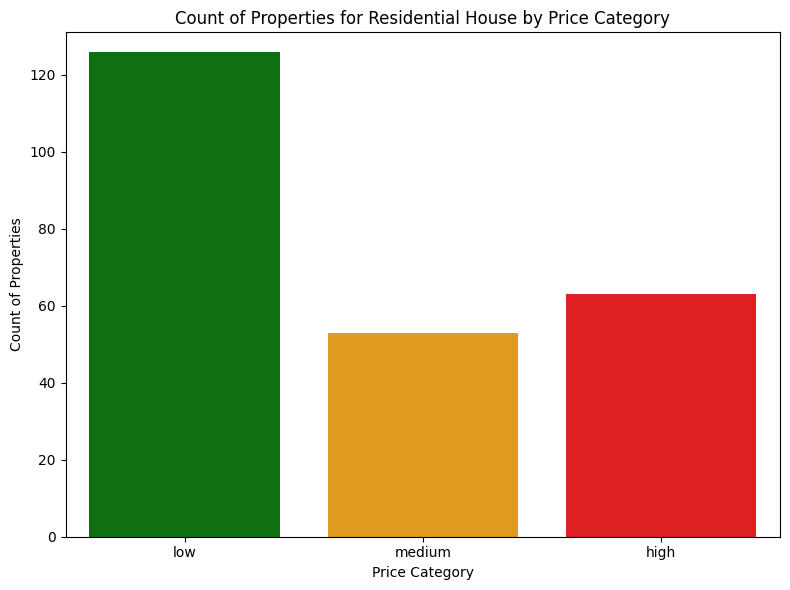

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/3208472100.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


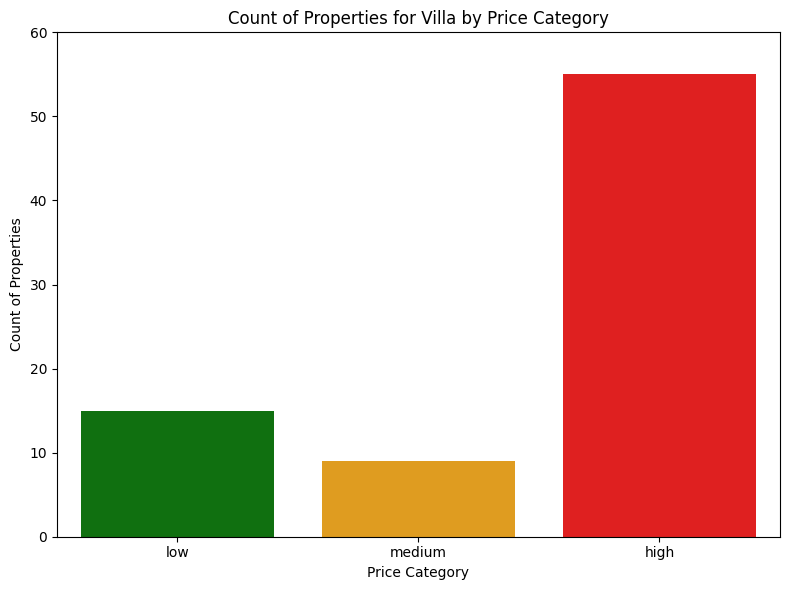

In [39]:
summary_table = df.groupby(['Type of Property', 'Price Category']).agg({
    'Price': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

summary_table.columns = ['Type of Property', 'Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)

summary_table = summary_table.sort_values(['Type of Property', 'Price Category']).reset_index(drop=True)

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

summary_table = df.groupby(['Type of Property', 'Price Category']).agg({
    'Price': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

summary_table.columns = ['Type of Property', 'Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

category_order = ['low', 'medium', 'high']
summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)

summary_table = summary_table.sort_values(['Type of Property', 'Price Category']).reset_index(drop=True)

colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

property_types = summary_table['Type of Property'].unique()

for property_type in property_types:
    plt.figure(figsize=(8, 6))
    subset = summary_table[summary_table['Type of Property'] == property_type]
    
    sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)
    
    plt.title(f'Count of Properties for {property_type} by Price Category')
    plt.xlabel('Price Category')
    plt.ylabel('Count of Properties')
    plt.ylim(0, max(subset['Count']) + 5)  # Adjust y-limit for better visualization
    plt.tight_layout()
    
    plt.show()

+----+-----------+----------------+--------------------+--------------------+------------+---------------+-------+
|    |   City    | Price Category |        Mean        |      Std Dev       |    Min     |      Max      | Count |
+----+-----------+----------------+--------------------+--------------------+------------+---------------+-------+
| 0  | Agartala  |      low       |     5117000.0      |        nan         | 5117000.0  |   5117000.0   |   1   |
| 1  | Bhiwandi  |      low       |     2200000.0      |        0.0         | 2200000.0  |   2200000.0   |   2   |
| 2  |  Gurgaon  |      low       |     3500000.0      |        nan         | 3500000.0  |   3500000.0   |   1   |
| 3  | Hyderabad |      low       |     3968750.0      | 2441448.2674955744 | 1800000.0  |   8000000.0   |   8   |
| 4  |  Kalyan   |      low       | 4328571.428571428  | 1437549.1710016807 | 2200000.0  |   7000000.0   |   7   |
| 5  |  Kalyan   |     medium     |     9750000.0      | 353553.39059327374 | 95

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


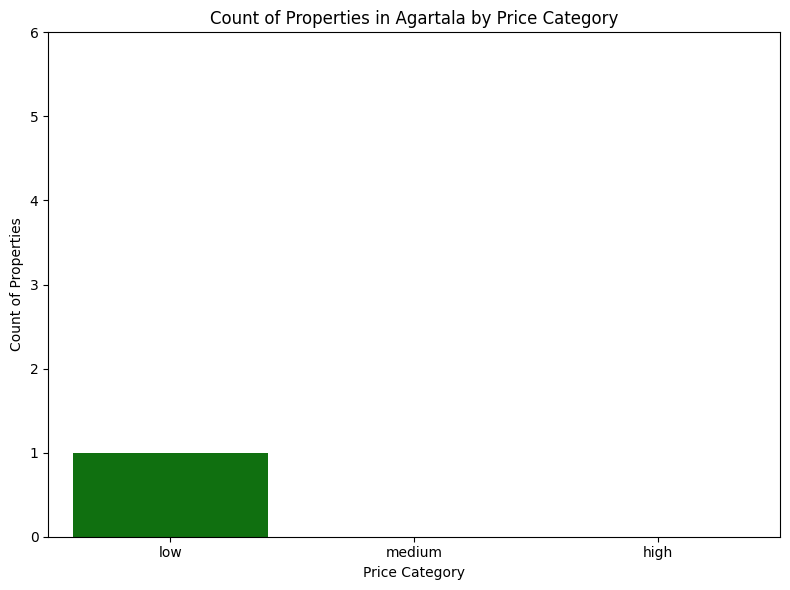

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


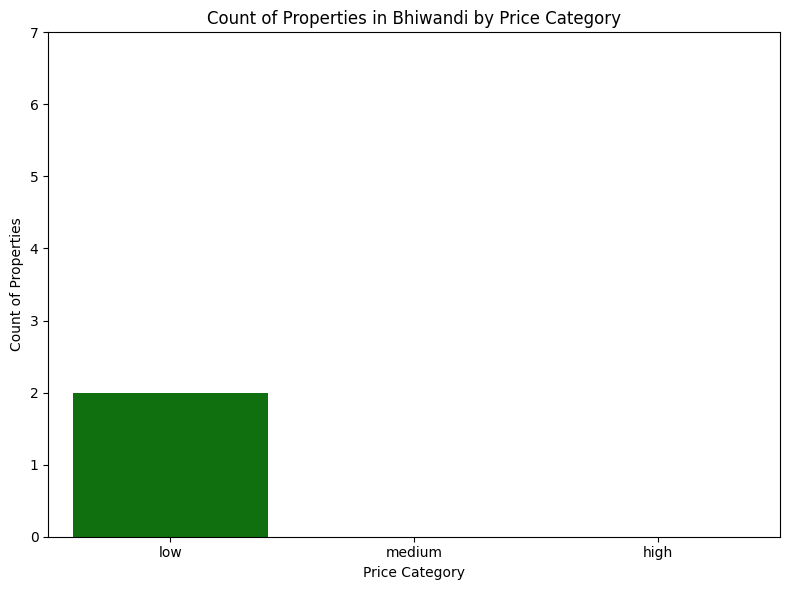

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


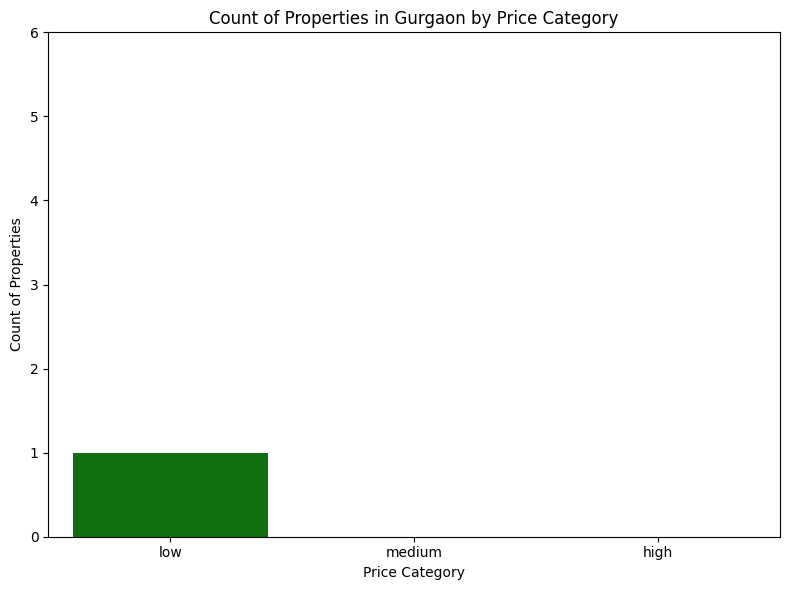

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


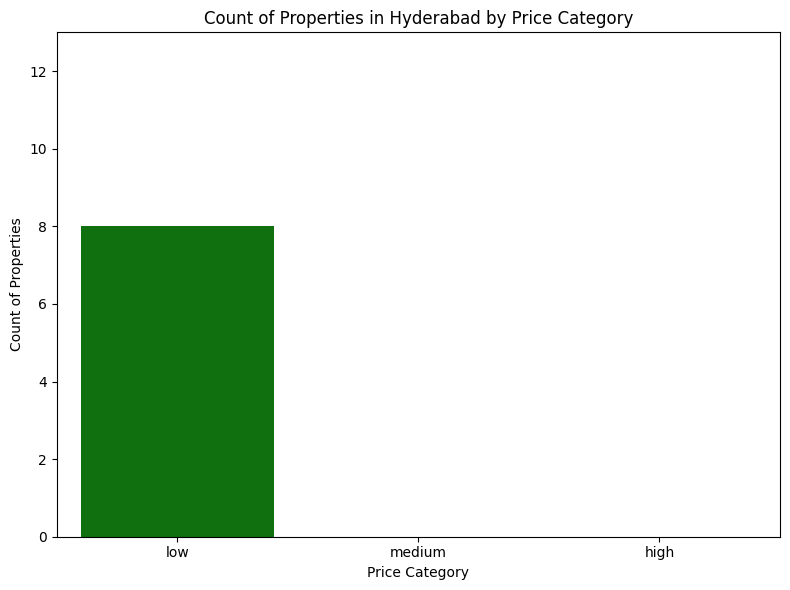

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


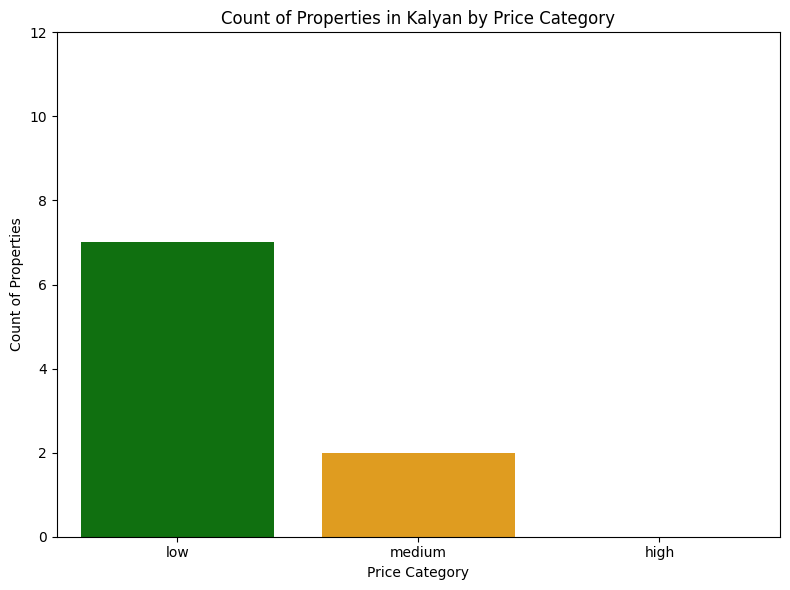

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


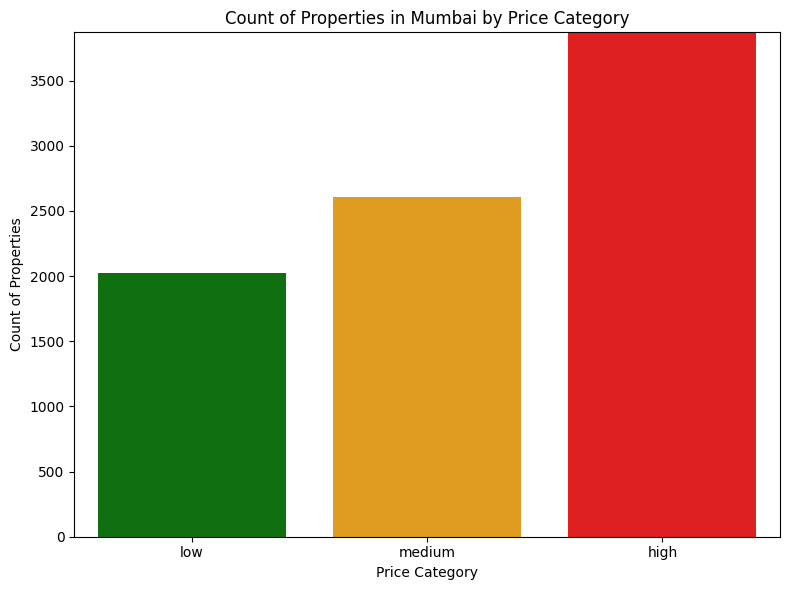

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


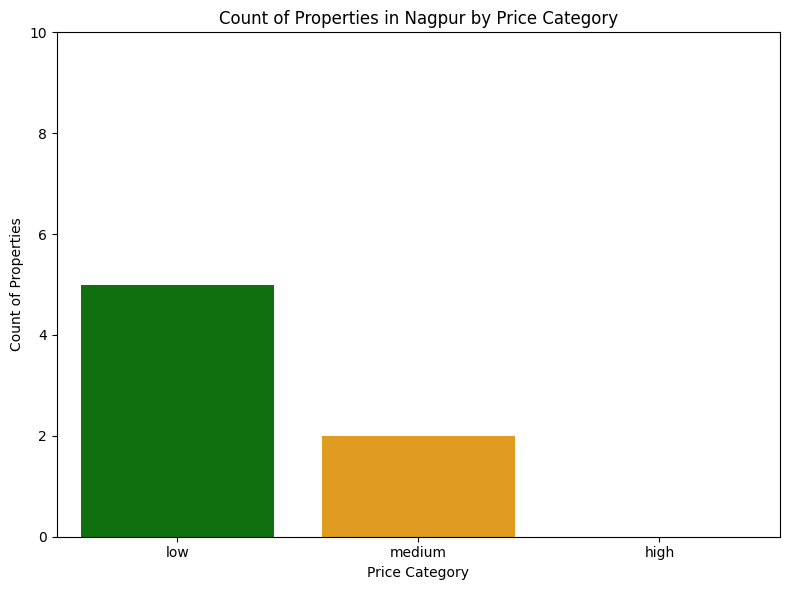

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


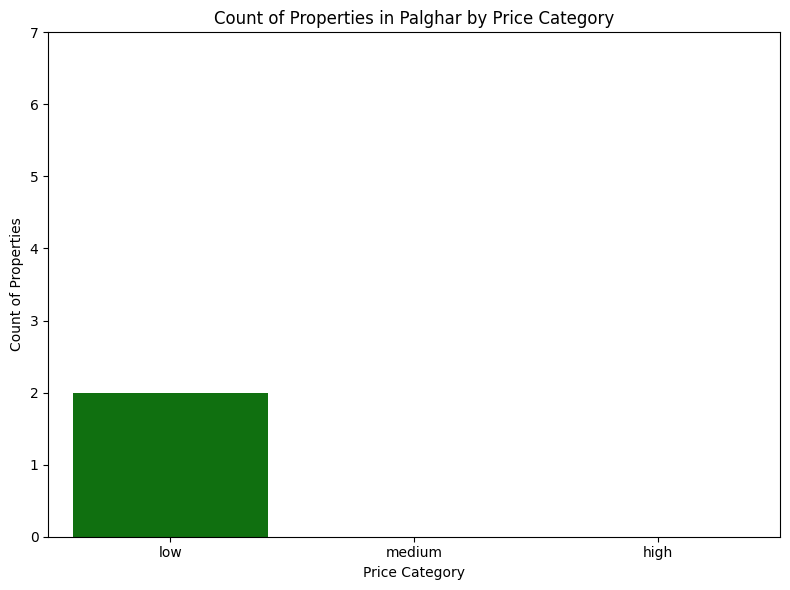

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_3759/2446817453.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)


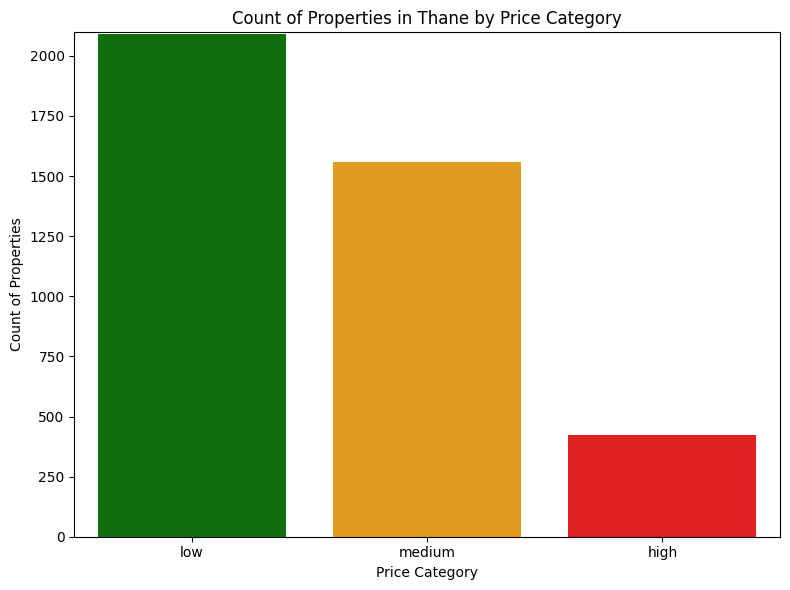

In [40]:
summary_table = df.groupby(['City', 'Price Category']).agg({
    'Price': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

summary_table.columns = ['City', 'Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']


category_order = ['low', 'medium', 'high']
summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)


summary_table = summary_table.sort_values(['City', 'Price Category']).reset_index(drop=True)


print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}


cities = summary_table['City'].unique()


for city in cities:
    plt.figure(figsize=(8, 6))
    subset = summary_table[summary_table['City'] == city]
    
    sns.barplot(data=subset, x='Price Category', y='Count', palette=colors, order=category_order)
    
    plt.title(f'Count of Properties in {city} by Price Category')
    plt.xlabel('Price Category')
    plt.ylabel('Count of Properties')
    plt.ylim(0, max(subset['Count']) + 5)  
    plt.tight_layout()
    
    plt.show()